<a href="https://colab.research.google.com/github/Bhushan271098/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Acquire and loading data**

In [62]:
# import libraries
import re
import os
import nltk
import string
import gensim
import matplotlib
import numpy as np
import pandas as pd
import tqdm as tqdm
import seaborn as sns
import tensorflow as tf
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import gensim.corpora as corpora

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
np.random.seed(2018)
nltk.download('stopwords')

from os import path
from PIL import Image
from scipy import stats
from pprint import pprint
from sklearn import metrics
from wordcloud import WordCloud
from ctypes import DEFAULT_MODE
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.stem.snowball import SnowballStemmer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from plotly.offline import iplot,plot,init_notebook_mode
init_notebook_mode(connected= True)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score, silhouette_samples


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File path of dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Bhushan Patil/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Exploratory data analysis**

In [4]:
# head of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# shape of data
df.shape

(7787, 12)

In [6]:
# Columns present in data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# checking null value present in data
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# total null value
df.isnull().sum().sum()

3631

**There are total 3631 null value present in data therefore data cleaning is require.**

In [10]:
# adding text at null value
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)

In [11]:
# null value after data cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

## **Netflix Content Analysis**

In [13]:
# Extracting TV show
netflix_shows=df[df['type']=='TV Show']

In [14]:
# Extracting movie
netflix_movies=df[df['type']=='Movie']

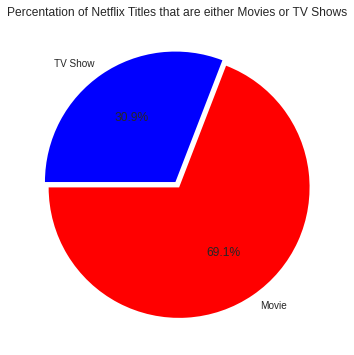

In [15]:
# pie chart of percentage of content present
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels= df.type.value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

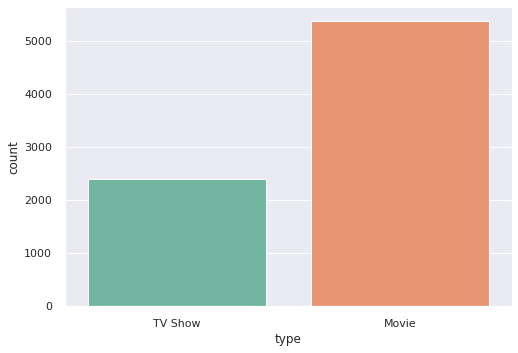

In [16]:
# countplot of content
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

In [17]:
# number of movie and tv show
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

**It was evident that there were more movies on Netflix than TV shows.**

## **Netflix Rating Analysis**

To make things simpler whole, 14 categories were split into three age groups: kids, Teens, Adults 

**Maturity rating**

TV-Y : Kids

TV-Y7 : Kids

TV-G : Kids

PG : Kids

TV-PG : Kids

PG-13 : Teens

TV-14 : Teens

R : Adults

TV-MA : Adults

NC-17 : Adults

NR : Adults

UR : Adults

TV-Y7-FV : Kids

G : Kids

These are maturity wise classification 

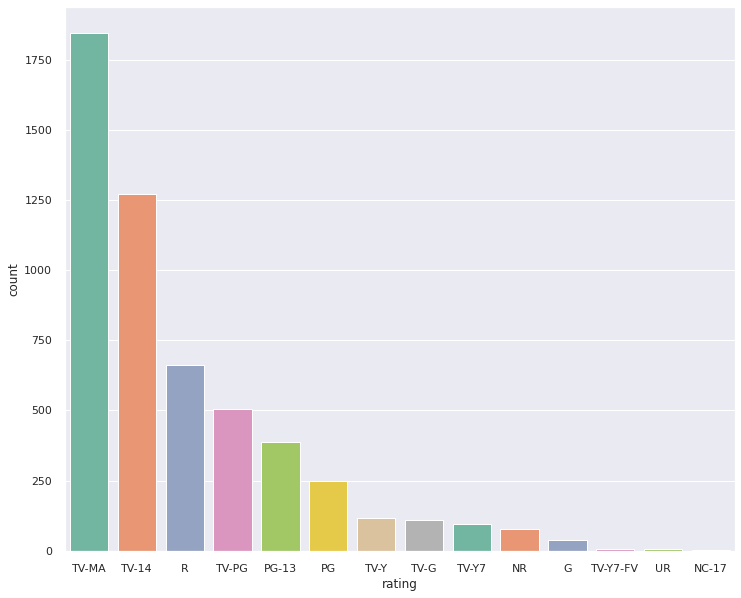

In [18]:
# countplot of netflix movie rating
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

**The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.**

**Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.**

**Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".** 

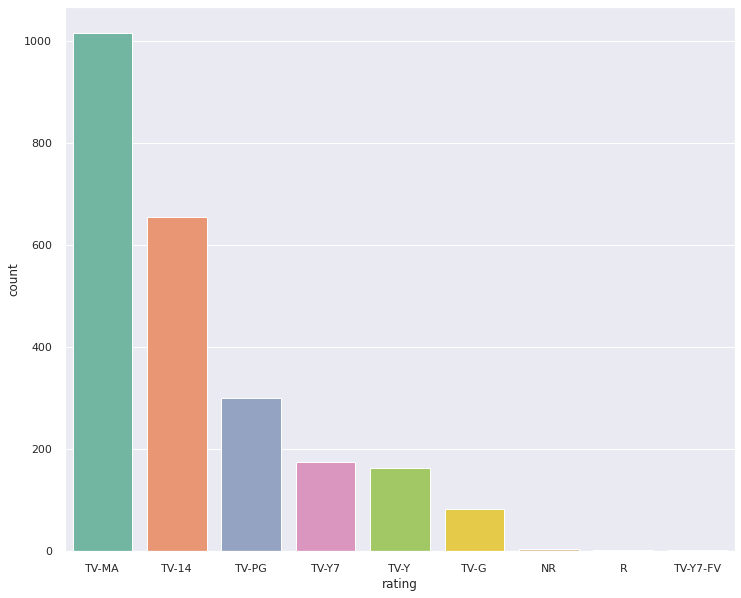

In [19]:
# countplot of TV show rating
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:15])

**The largest count of TV shows are made with the 'TV-MA' rating.**

**Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.**

**Third largest is the 'TV-PG' rating.**

## **Amount of Content By Rating**

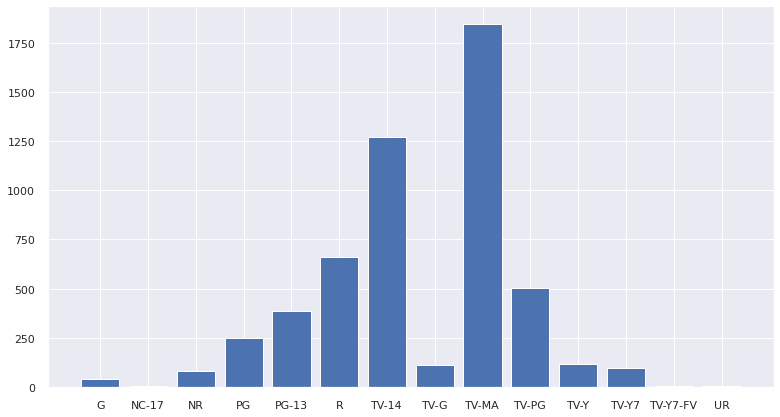

,rating,title
0,G,39
1,NC-17,3
2,NR,79
3,PG,247
4,PG-13,386
5,R,663
6,TV-14,1272
7,TV-G,111
8,TV-MA,1845
9,TV-PG,505


In [20]:
# count movie rating
order = df.rating.unique()
count_movies = netflix_movies.groupby('rating')['title'].count().reset_index()
plt.figure(figsize=(13,7))
plt.bar(count_movies.rating, count_movies.title)
plt.show()
count_movies

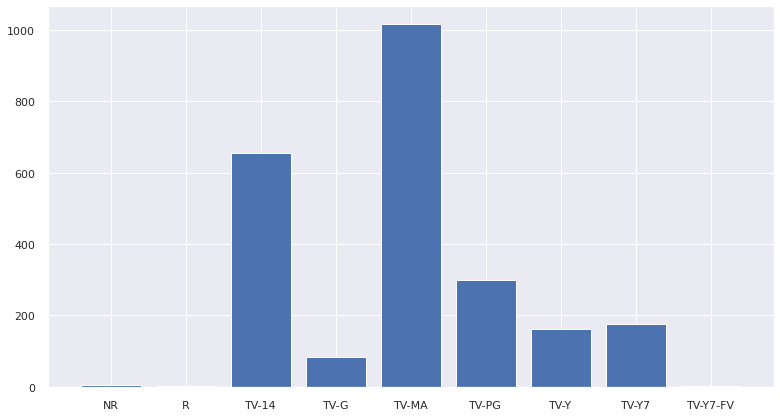

,rating,title
0,NR,4
1,R,2
2,TV-14,656
3,TV-G,83
4,TV-MA,1016
5,TV-PG,299
6,TV-Y,162
7,TV-Y7,175
8,TV-Y7-FV,1


In [21]:
# count TV show rating
count_shows = netflix_shows.groupby('rating')['title'].count().reset_index()
plt.figure(figsize=(13,7))
plt.bar(count_shows.rating, count_shows.title)
plt.show()
count_shows

## **Content growth over years**

In [22]:
# Extracting data from release year
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

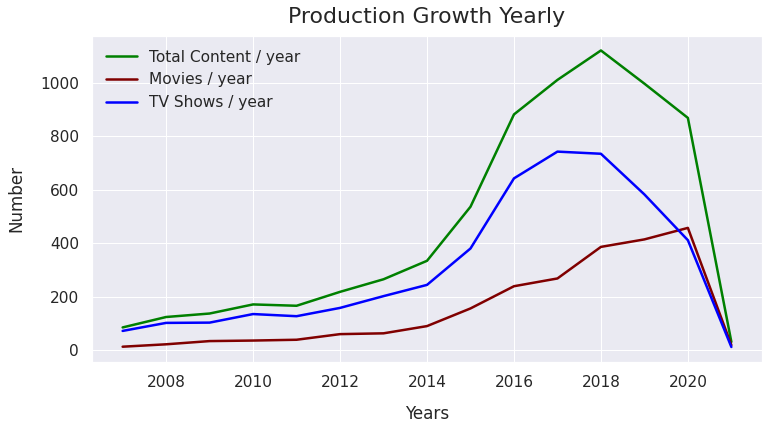

In [23]:
# plot of content
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

**Total content decreases from 2018 to 2020.**

**Movie content also decreases from 2018 to 2020.** 

**But TV show content increses from 2018 to 2020.**


## **Year wise analysis**

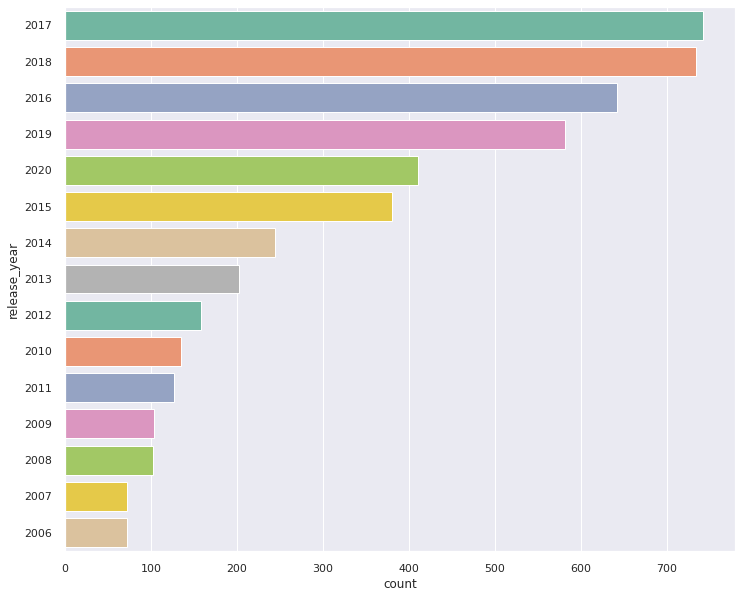

In [24]:
# countplot of release year of netflix movie
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

**So, 2017 was the year when most of the movies were released.**

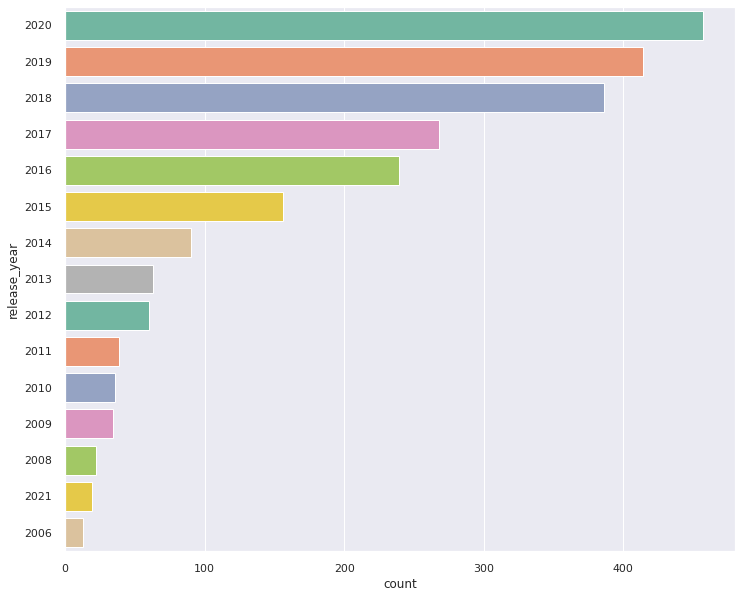

In [25]:
# countplot of release year of netflix show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

**So, 2020 was the year when most of the TV shows were released.**

## **Analysis of duration of movies**

In [26]:
# Extracting duration of movie
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5372, dtype: int64

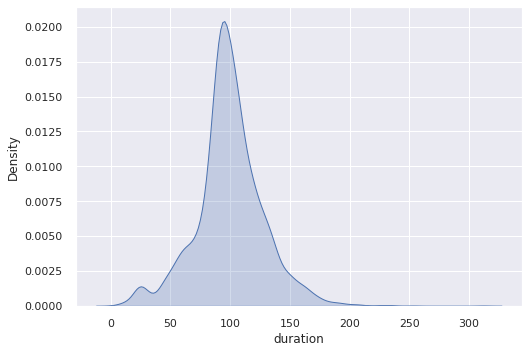

In [27]:
# plot of netflix movie duration
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

**So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.**

## **Top Genres on Netflix**

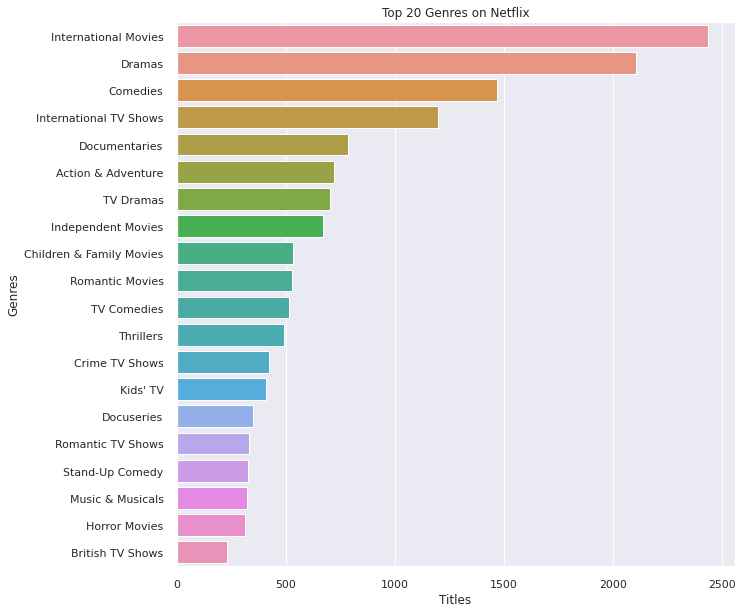

In [28]:
# Top 20 genres on Netflix
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**International Movies and Dramas were top two Genres on Netflix.**

## **Top 10 Actor Based on the Number of Titles**

In [29]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [30]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)

In [31]:
# obtain head of actor list
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


In [32]:
# Extracting top 10 actors
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# print top 10 actors
top_10_actors

,Actors name,Count
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


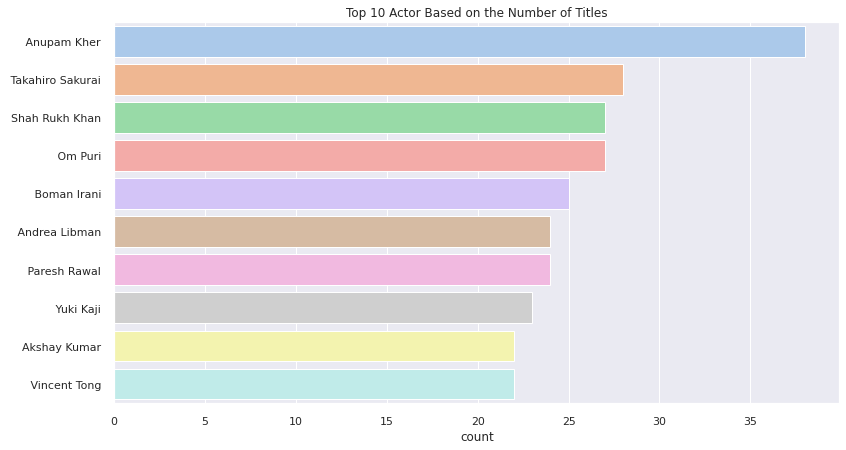

In [34]:
# count plot of top 10 actor on the number of titiles
filtered_cast = df[df.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Based on the Number of Titles')
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='pastel')
plt.show()

**Anupam kher was top actor acted in most number of titles.**

## **Top 10 Actor in Movies Based on the Number of Titles**

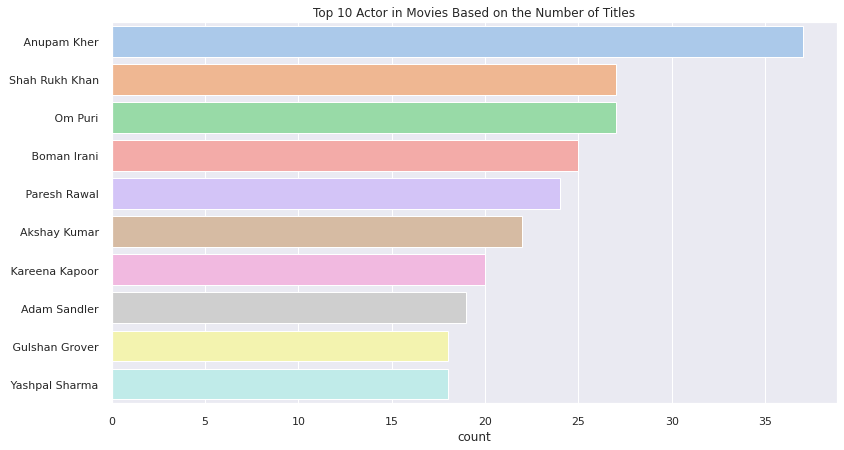

In [35]:
# top 10 actor in movie
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in Movies Based on the Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

**Anupam kher was top actor acted in most number of movies.**

## **Top 10 Actor in TV Shows Based on the Number of Titles**

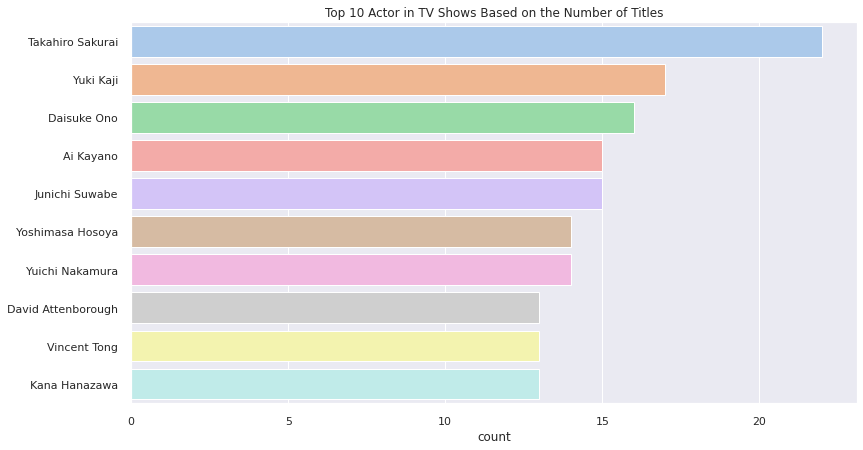

In [36]:
# top 10 actor in show
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in TV Shows Based on the Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

**Takahiro Sakurai was top actor acted in most number of TV shows.**

## **Top Directors on Netflix**

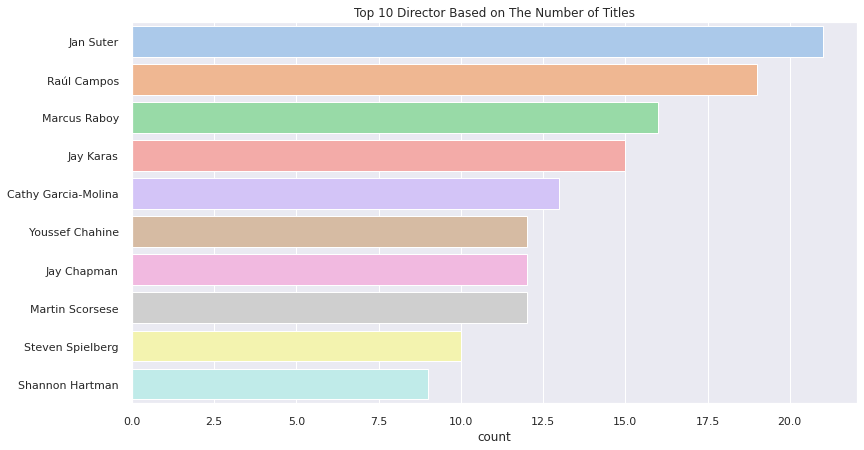

In [37]:
# Top 10 director based on number of titles
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='pastel')
plt.show()

**Jan suter and Raul Campos were top two directors on the basis of number of titles.**

## **TV shows with largest number of seasons**

In [38]:
# Extracting features
features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)

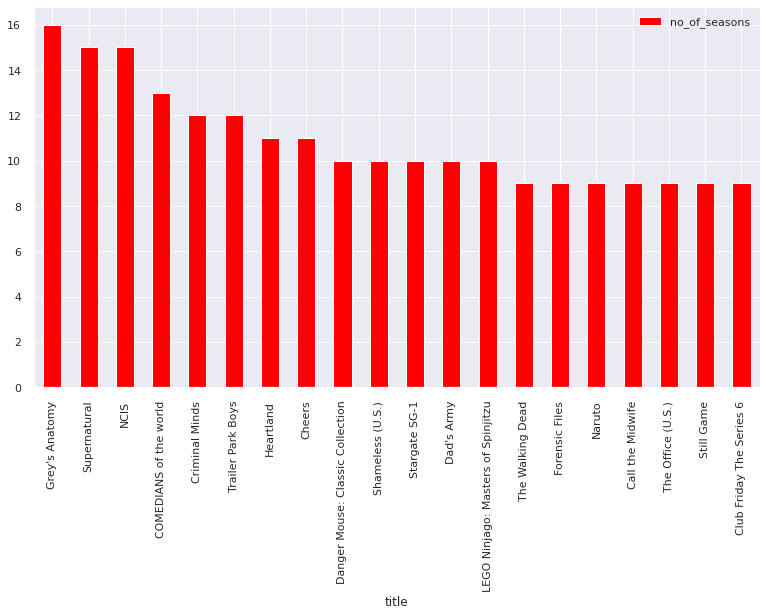

In [41]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red', figsize=(13,7))

**Grey's Anatomy had highest number of seasons 16.**

## **Release of content month-wise**

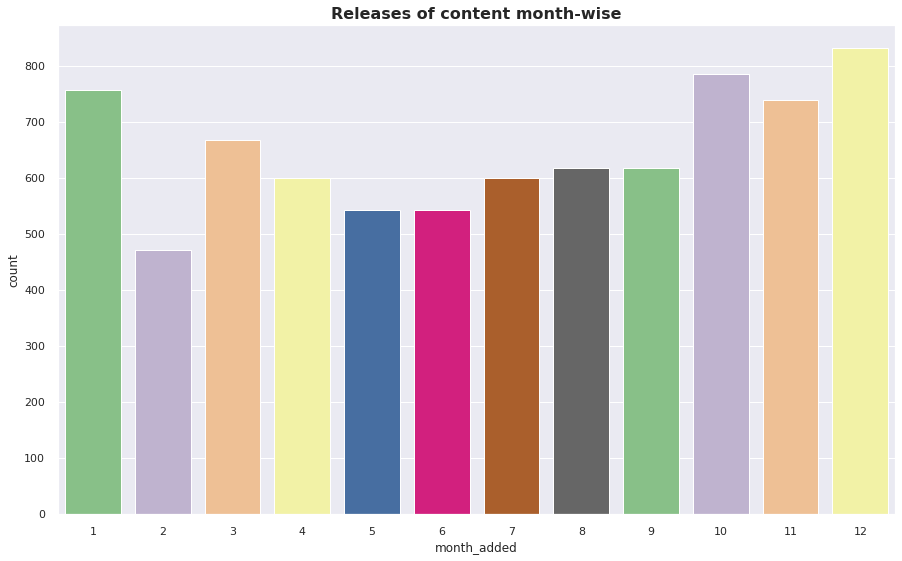

In [42]:
# Release of content month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=df,palette="Accent")

plt.title('Releases of content month-wise',size='16',fontweight="bold")    
plt.show()

**More of the content was released in holiday season - October, November, December and January**

## **Release of movies month-wise**

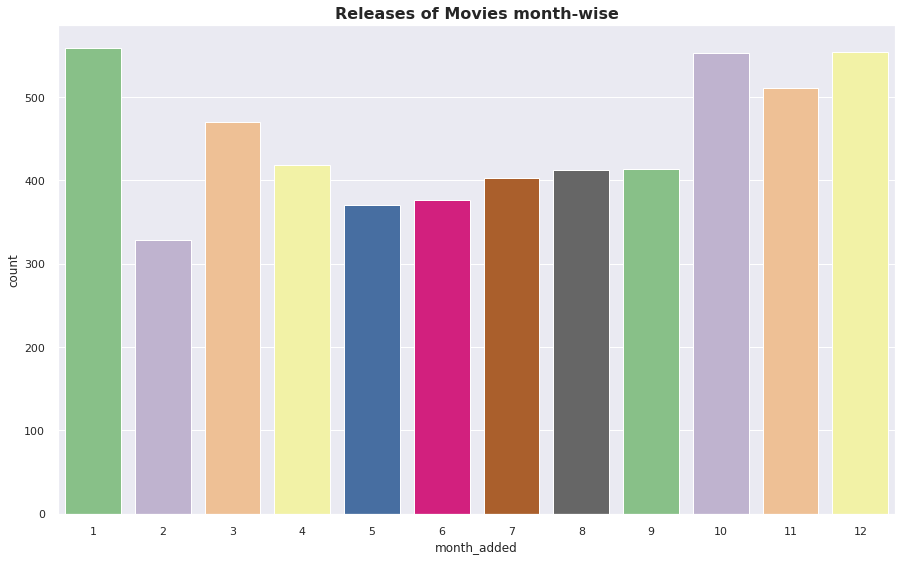

In [43]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=netflix_movies,palette="Accent")

plt.title('Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

**More number of movie release in month of January and December.**

## **Releases of TV Shows month-wise**

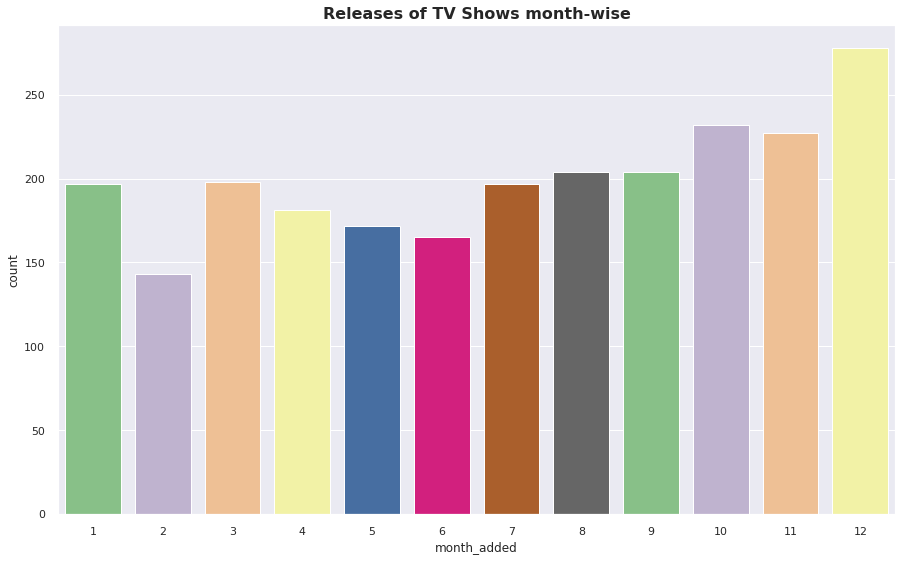

In [44]:
# Release of TV Shows month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=netflix_shows,palette="Accent")

plt.title('Releases of TV Shows month-wise',size='16',fontweight="bold")    
plt.show()

**More number of TV show release in month of December.**

## **Total release for last 10 years**

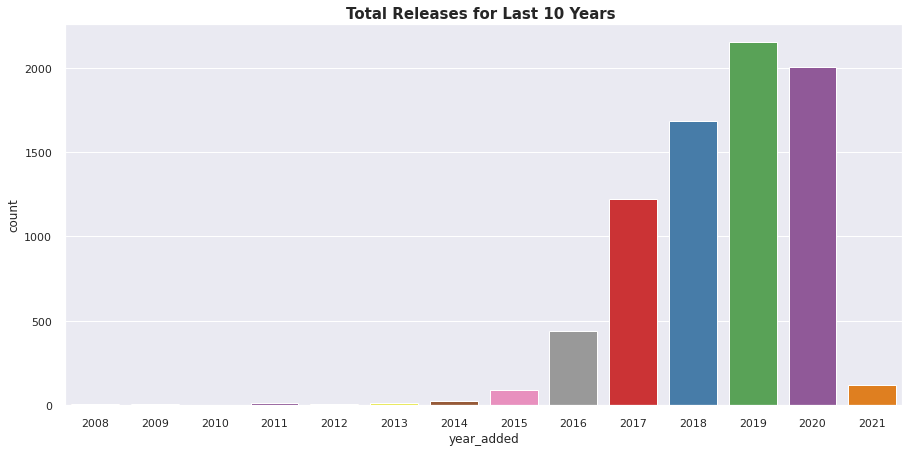

In [45]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Set1")
plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19.**

## **Top 10 Movie Content Creating Countries**

In [46]:
countries={}
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [47]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

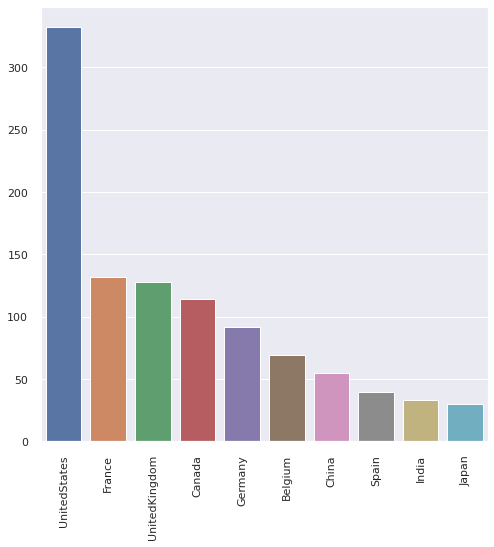

In [48]:
# plot of countries
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

## **Top 15 Countries Contributor on Netflix**

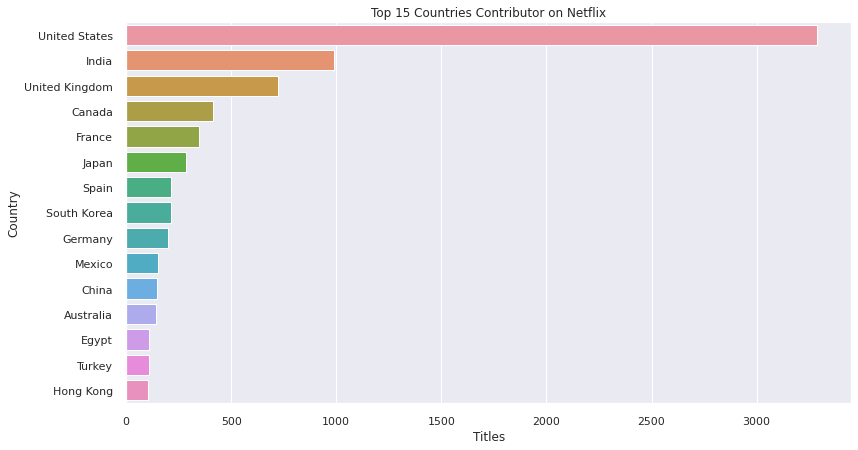

In [49]:
# countplot of top 15 countries
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [50]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [51]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [52]:
#Top 5 countries
top_countries=country_df
top_countries.head(5)

,country,Productions,TV-Shows,Movies
0,United States,3288,860,2428
1,India,990,75,915
2,United Kingdom,722,255,467
3,Country Unavailable,505,276,229
4,Canada,412,126,286


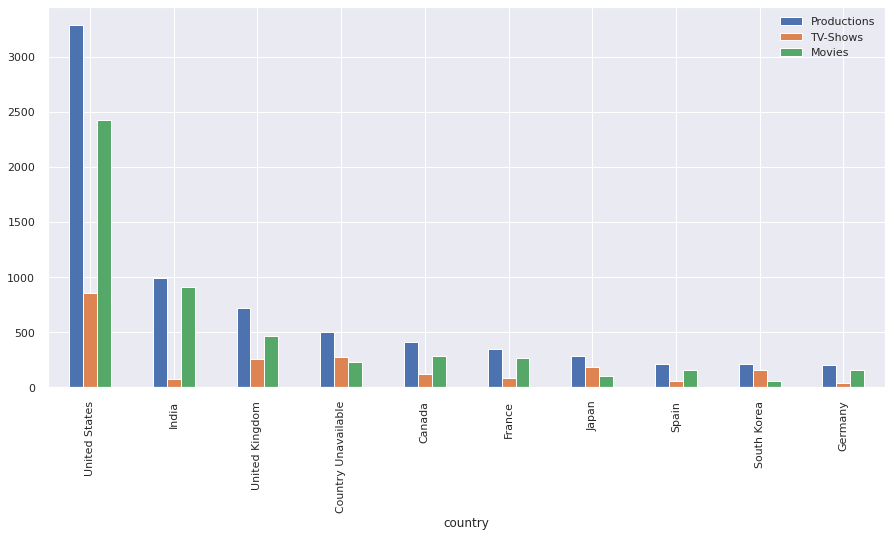

In [53]:
top_countries.head(10).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

**United State was highest contributor on netflix.**

## **Content across all years**

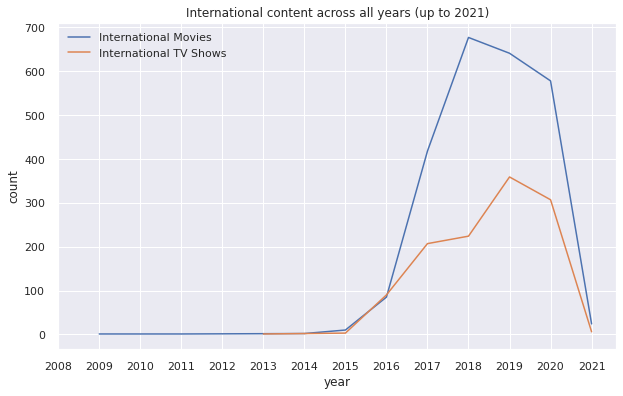

In [54]:
# line plot of international content
international_movies = df[df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2022]

international_shows = df[df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2022]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2022, 1))
plt.title("International content across all years (up to 2021)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

**Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years.**

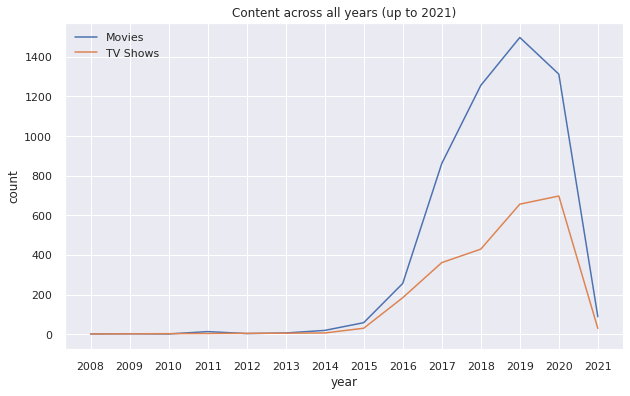

In [55]:
# line plot of content
netflix_movies = df[df['type']=='Movie']
intmov_year = netflix_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2022]

netflix_shows = df[df['type']=='TV Show']
intshow_year = netflix_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2022]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2022, 1))
plt.title("Content across all years (up to 2021)")
plt.legend(['Movies','TV Shows'])
plt.show()


**Growth in TV shows from 2018 to 2020.**

**Decreases in movies from 2019 to 2020.**

**Therefore Netflix has increasingly focusing on TV rather than movies in recent years.**

## **Netflix Content for different age groups in top 10 countries**

In [56]:
# Extracting data
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [57]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['age_rating'] = df['rating'].replace(rating_ages)
df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [58]:
# data of heatmap
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['age_rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Canada,Country Unavailable,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.467181,0.318812,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.526042,0.488518
Kids,0.150579,0.170297,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.078125,0.074809
Older Kids,0.220077,0.235644,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.184028,0.196242
Teens,0.027027,0.005941,0.030612,0.004184,0.012766,0.016260,0.000000,0.017857,0.071181,0.098469
Young Adults,0.135135,0.269307,0.142857,0.557531,0.336170,0.113821,0.365979,0.095238,0.140625,0.141962


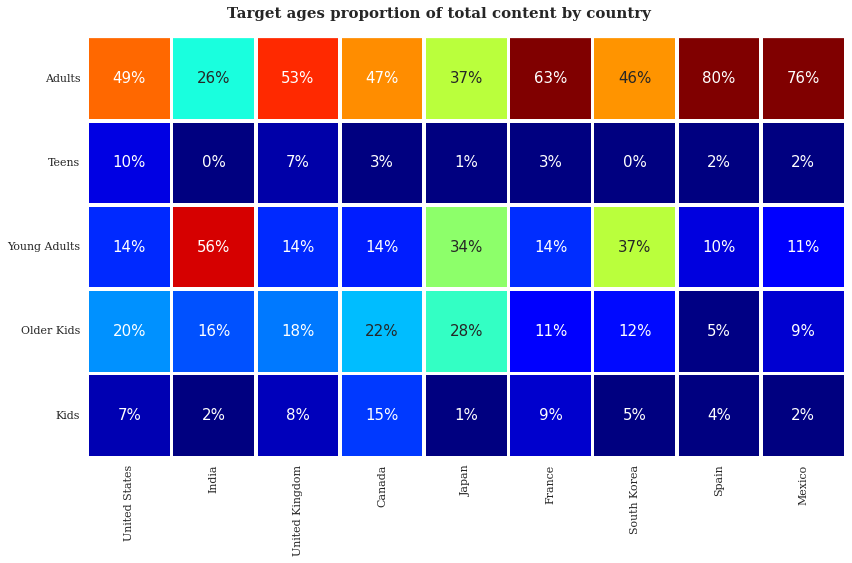

In [59]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**Top:**

**80% of adults content present in Spain.**

**10% of teens content present in United States.**

**56% of young adults content present in India.**

**28% of older kids content present in Japan.**

**15% of kids content present in Canada.**


# **Topic Modeling**

## **Latent Dirichlet Allocation (LDA)**

In [60]:
# head of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,principal_country,age_rating,count
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8,Brazil,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,Mexico,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12,Singapore,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11,United States,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1,United States,Teens,1


In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
# obtain dataframe of text data
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.head()

,title,cluster_data
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...


In [67]:
# Remove punctuation
cluster_df['text_processed'] = \
cluster_df['cluster_data'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
cluster_df['text_processed'] = \
cluster_df['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
cluster_df['text_processed'].head()

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world rag-doll robots hid...
4    a brilliant group of students become card-coun...
Name: text_processed, dtype: object

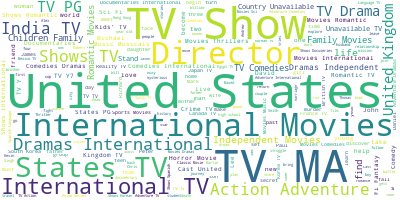

In [68]:
# Join the different processed titles together.
long_string = ','.join(list(cluster_df['cluster_data'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [69]:
# data word after removing stop word
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = cluster_df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:50])

['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'sci', 'fi', 'fantasy', 'director', 'joao', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zeze', 'motta', 'celso', 'frateschi', 'brazil', 'tv']


In [70]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:50])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 4), (41, 1), (42, 1), (43, 1), (44, 1)]


In [71]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"tv" + 0.021*"united" + 0.018*"states" + 0.015*"movies" + '
  '0.008*"dramas" + 0.007*"pg" + 0.006*"comedies" + 0.006*"international" + '
  '0.006*"family" + 0.005*"kingdom"'),
 (1,
  '0.018*"united" + 0.016*"states" + 0.011*"movies" + 0.010*"tv" + 0.009*"pg" '
  '+ 0.006*"action" + 0.006*"adventure" + 0.006*"comedies" + 0.005*"john" + '
  '0.005*"dramas"'),
 (2,
  '0.024*"tv" + 0.017*"movies" + 0.012*"international" + 0.008*"dramas" + '
  '0.007*"united" + 0.007*"india" + 0.005*"action" + 0.005*"adventure" + '
  '0.004*"shows" + 0.004*"states"'),
 (3,
  '0.021*"tv" + 0.011*"movies" + 0.010*"international" + 0.010*"dramas" + '
  '0.007*"action" + 0.007*"adventure" + 0.006*"united" + 0.005*"states" + '
  '0.005*"comedies" + 0.003*"hong"'),
 (4,
  '0.017*"movies" + 0.016*"tv" + 0.010*"dramas" + 0.009*"international" + '
  '0.008*"united" + 0.006*"states" + 0.004*"country" + 0.004*"comedies" + '
  '0.003*"unavailable" + 0.003*"india"'),
 (5,
  '0.043*"tv" + 0.018*"internatio

In [72]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [73]:
reindexed_data = cluster_df['text_processed']

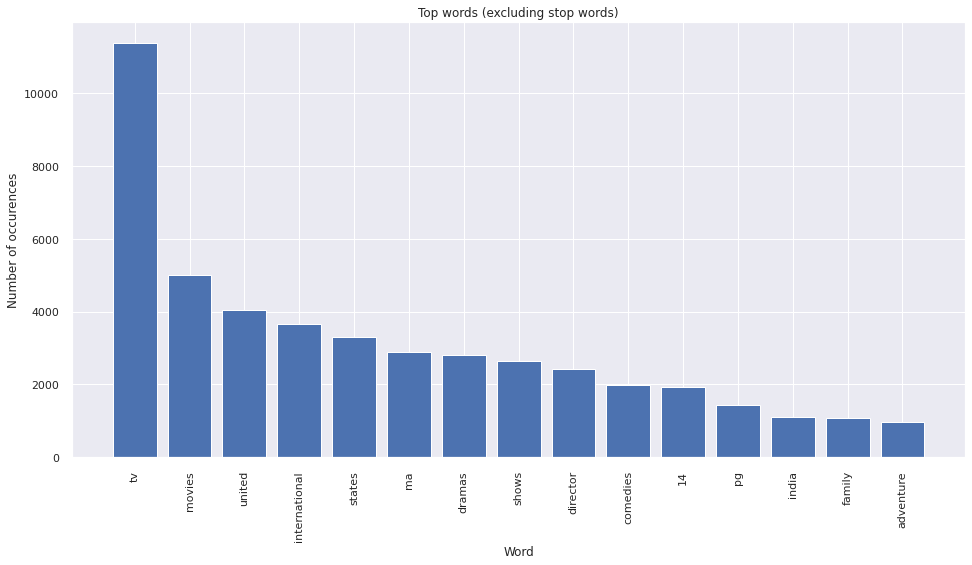

In [74]:
# top word after excluding stop word
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data = reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [75]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [76]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.117*"tv" + 0.044*"shows" + 0.027*"director" + 0.026*"international" + '
  '0.010*"crime" + 0.010*"dramas" + 0.009*"romantic" + 0.006*"south" + '
  '0.006*"young" + 0.006*"lee"'),
 (1,
  '0.018*"united" + 0.018*"states" + 0.017*"comedies" + 0.011*"family" + '
  '0.011*"movies" + 0.010*"children" + 0.008*"tv" + 0.006*"stand" + '
  '0.005*"comedy" + 0.004*"new"'),
 (2,
  '0.037*"movies" + 0.016*"dramas" + 0.014*"international" + 0.009*"france" + '
  '0.007*"independent" + 0.007*"horror" + 0.007*"thrillers" + 0.005*"woman" + '
  '0.004*"germany" + 0.004*"africa"'),
 (3,
  '0.024*"movies" + 0.014*"international" + 0.014*"dramas" + 0.011*"comedies" '
  '+ 0.009*"al" + 0.008*"el" + 0.006*"tv" + 0.005*"ali" + 0.005*"egypt" + '
  '0.005*"mohamed"'),
 (4,
  '0.036*"united" + 0.028*"states" + 0.015*"movies" + 0.012*"dramas" + '
  '0.011*"michael" + 0.010*"pg" + 0.010*"john" + 0.008*"paul" + '
  '0.008*"kingdom" + 0.007*"david"'),
 (5,
  '0.069*"tv" + 0.037*"united" + 0.026*"states" + 0.

In [77]:
# Evaluate base model- Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.38522918528361627


In [78]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [79]:
# Iterate over possible number of topics. takes about 2-3mins
topic_param = [1,2,3,4,5,6,7,8,9,10]
coherence_score = []

for k in topic_param:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    coherence_score.append(cv)

param_tuning_coherence = pd.DataFrame()
param_tuning_coherence["topic_param"] = topic_param
param_tuning_coherence['coherence_score'] = coherence_score
param_tuning_coherence

,topic_param,coherence_score
0,1,0.182079
1,2,0.247459
2,3,0.332133
3,4,0.367605
4,5,0.357495
5,6,0.359289
6,7,0.404566
7,8,0.399578
8,9,0.379096
9,10,0.391688


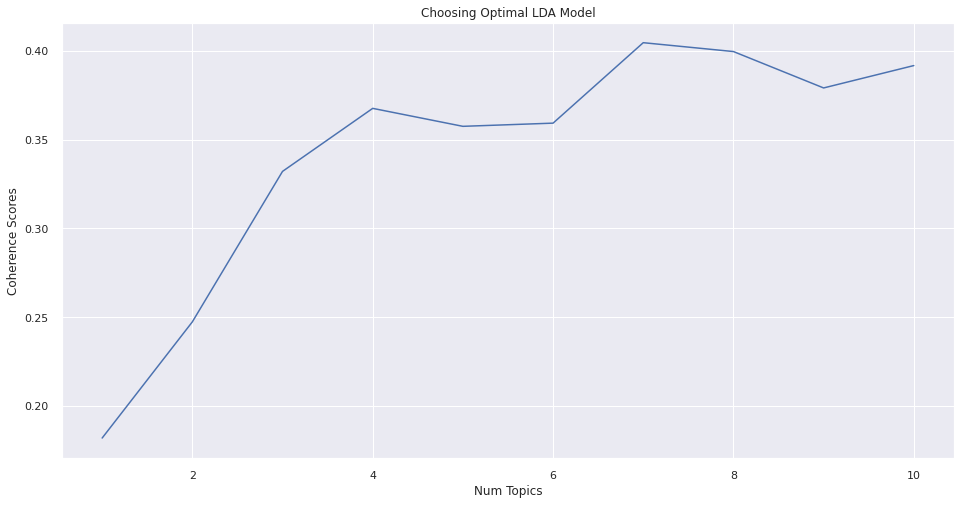

In [80]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(topic_param, param_tuning_coherence['coherence_score'])

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Scores")
plt.show()

**Coherence score of 7 topic is higher therefore, used it for building LDA model.**

In [81]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [82]:
# Print the Keyword in the 7 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.143*"tv" + 0.034*"shows" + 0.032*"director" + 0.023*"international" + '
  '0.010*"romantic" + 0.010*"documentaries" + 0.009*"cast" + 0.007*"crime" + '
  '0.007*"dramas" + 0.007*"country"'),
 (1,
  '0.046*"united" + 0.036*"states" + 0.022*"movies" + 0.012*"family" + '
  '0.012*"pg" + 0.012*"comedies" + 0.010*"dramas" + 0.010*"john" + '
  '0.008*"kingdom" + 0.008*"david"'),
 (2,
  '0.040*"movies" + 0.024*"india" + 0.023*"dramas" + 0.022*"international" + '
  '0.008*"comedies" + 0.005*"khan" + 0.005*"independent" + 0.005*"man" + '
  '0.005*"kapoor" + 0.005*"singh"'),
 (3,
  '0.023*"adventure" + 0.023*"action" + 0.010*"music" + 0.009*"movies" + '
  '0.007*"musicals" + 0.006*"chen" + 0.006*"comedies" + 0.005*"becomes" + '
  '0.005*"day" + 0.005*"wang"'),
 (4,
  '0.027*"movies" + 0.017*"international" + 0.014*"dramas" + 0.009*"france" + '
  '0.009*"spain" + 0.008*"de" + 0.007*"comedies" + 0.006*"jason" + 0.006*"al" '
  '+ 0.005*"war"'),
 (5,
  '0.020*"michael" + 0.013*"kids" + 0.01

In [83]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, id2word,mds='tsne')
lda_viz

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -29.594002  60.112713       1        1  24.322187
1     -45.996586  11.891685       2        1  23.508595
4      20.368856  70.019325       3        1  12.651085
5      53.928768  31.704309       4        1  12.256385
2     -12.437127 -26.423267       5        1  10.404986
3       3.965971  21.797720       6        1  10.364013
6      37.524284 -16.517805       7        1   6.492748, topic_info=               Term          Freq         Total Category  logprob  loglift
40               tv  10434.000000  10434.000000  Default  30.0000  30.0000
146          united   3735.000000   3735.000000  Default  29.0000  29.0000
37            shows   2487.000000   2487.000000  Default  28.0000  28.0000
6          director   2317.000000   2317.000000  Default  27.0000  27.0000
143          states   2937.000000   2937.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
332           hotel     42.217836     42.952993   Topic7  -6.1356   2.7172
1228        gregory     41.068335     41.804350   Topic7  -6.1632   2.7167
2636           bank     39.955970     40.695094   Topic7  -6.1907   2.7162
18    international     89.582875   3105.960149   Topic7  -5.3833  -0.8114
62           movies     53.165617   4129.205042   Topic7  -5.9051  -1.6179

[303 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
110       6  0.999167     action
751       2  0.996732       adam
111       6  0.999216  adventure
227       3  0.994234      ahmed
228       3  0.998630         al
...     ...       ...        ...
922       1  0.993082      years
922       3  0.004774      years
580       1  0.674649      young
580       2  0.186887      young
580       5  0.137846      young

[321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 6, 3, 4, 7])

# **K-means clustering**

In [84]:
# obtain dataframe of text data
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.head()

,title,cluster_data
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...


In [85]:
# What does the data look like now?
cluster_df["cluster_data"]

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: cluster_data, Length: 7770, dtype: object

## **Removing punctuations**

In [86]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

## **Apply the function to each examples**

In [87]:
cluster_df["cluster_data"] = cluster_df["cluster_data"].apply(remove_punctuation)
cluster_df.head(10)

,title,cluster_data
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,When an army recruit is found dead his fellow ...
3,9,In a postapocalyptic world ragdoll robots hide...
4,21,A brilliant group of students become cardcount...
5,46,A genetics professor experiments with a treatm...
6,122,After an awful accident a couple admitted to a...
7,187,After one of his high school students attacks ...
8,706,When a doctor goes missing his psychiatrist wi...
9,1920,An architect and his wife move into a castle t...


## **Removing stopwords**

In [88]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

## **Function to remove stopwords**

In [89]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [90]:
# head of data
cluster_df["cluster_data"] = cluster_df["cluster_data"].apply(stopwords)
cluster_df.head(10)

,title,cluster_data
0,3%,future elite inhabit island paradise far crowd...
1,7:19,devastating earthquake hits mexico city trappe...
2,23:59,army recruit found dead fellow soldiers forced...
3,9,postapocalyptic world ragdoll robots hide fear...
4,21,brilliant group students become cardcounting e...
5,46,genetics professor experiments treatment comat...
6,122,awful accident couple admitted grisly hospital...
7,187,one high school students attacks dedicated tea...
8,706,doctor goes missing psychiatrist wife treats b...
9,1920,architect wife move castle slated become luxur...


## **Top words before stemming**

**Collect vocabulary count**

In [91]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(cluster_df["cluster_data"])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [92]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

**Bar plot of top words before stemming**

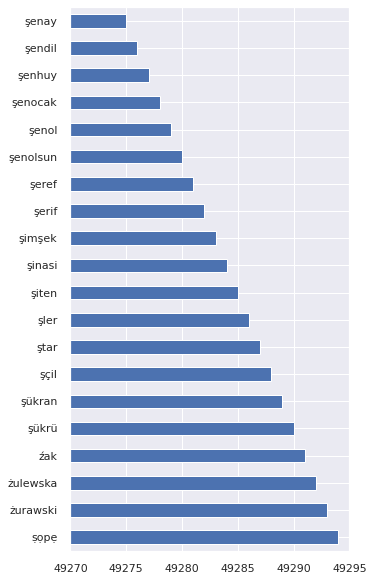

In [93]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (49270, 49295))

## **Stemming operations**

In [94]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [95]:
cluster_df["cluster_data"] = cluster_df["cluster_data"].apply(stemming)
cluster_df.head(10)

,title,cluster_data
0,3%,futur elit inhabit island paradis far crowd sl...
1,7:19,devast earthquak hit mexico citi trap survivor...
2,23:59,armi recruit found dead fellow soldier forc co...
3,9,postapocalypt world ragdol robot hide fear dan...
4,21,brilliant group student becom cardcount expert...
5,46,genet professor experi treatment comatos siste...
6,122,aw accid coupl admit grisli hospit separ must ...
7,187,one high school student attack dedic teacher t...
8,706,doctor goe miss psychiatrist wife treat bizarr...
9,1920,architect wife move castl slate becom luxuri h...


In [96]:
cluster_df["cluster_data"]

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world ragdol robot hide fear dan...
4       brilliant group student becom cardcount expert...
                              ...                        
7782    lebanon civil war depriv zozo famili hes left ...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next “willi ...
7786    documentari delv mystiqu behind bluesrock trio...
Name: cluster_data, Length: 7770, dtype: object

## **Top words after stemming operation**

In [97]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(cluster_df["cluster_data"])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

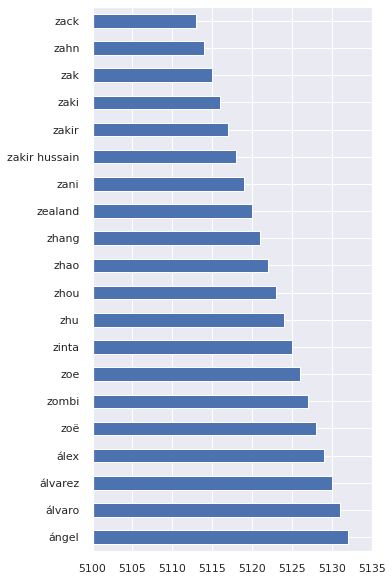

In [98]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5100,5135))

In [99]:
cluster_df["cluster_data"]

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world ragdol robot hide fear dan...
4       brilliant group student becom cardcount expert...
                              ...                        
7782    lebanon civil war depriv zozo famili hes left ...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next “willi ...
7786    documentari delv mystiqu behind bluesrock trio...
Name: cluster_data, Length: 7770, dtype: object

## **TF-IDF Extraction**

In [100]:
# create bag of words
bag_of_words = cluster_df.cluster_data

In [101]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [102]:
pca = PCA()
pca.fit(X.toarray())

PCA()

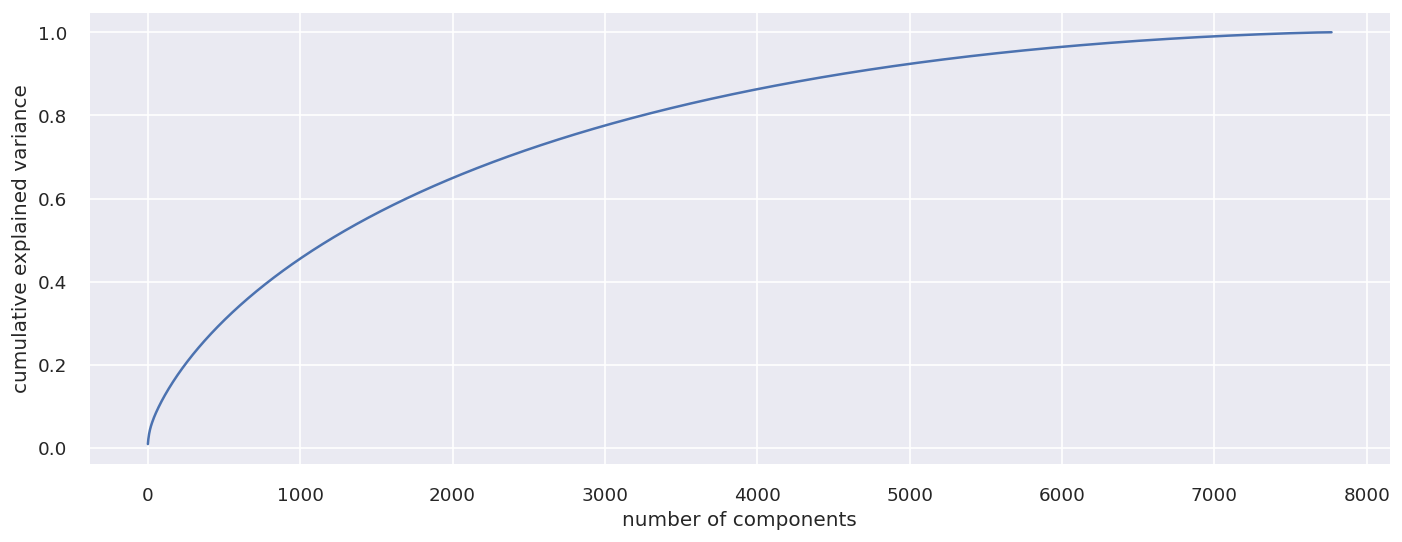

In [103]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [104]:
# shape after using PCA
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5585)

In [105]:
cluster_df["cluster_data"]

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world ragdol robot hide fear dan...
4       brilliant group student becom cardcount expert...
                              ...                        
7782    lebanon civil war depriv zozo famili hes left ...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next “willi ...
7786    documentari delv mystiqu behind bluesrock trio...
Name: cluster_data, Length: 7770, dtype: object

In [106]:
# print
print(X_transformed)

[[ 1.27473016e-01 -2.86610342e-02 -1.92899350e-02 ...  3.59016256e-03
  -6.99059852e-04  5.84511729e-03]
 [-4.37896571e-02 -3.61477127e-02  1.19396776e-02 ... -1.99819128e-03
   3.77844899e-03  7.38181760e-03]
 [-4.92161736e-02 -5.13002653e-02 -1.85746668e-02 ...  4.55361034e-03
  -1.08554989e-03 -1.24498339e-02]
 ...
 [-4.44780983e-02  1.10552254e-01  2.15632470e-01 ... -4.87625477e-03
  -1.00674910e-02 -9.57538352e-03]
 [ 1.08677400e-01  5.55851145e-03  9.20770048e-03 ... -2.90420927e-03
   1.96429011e-04  5.20756270e-03]
 [-8.89560783e-02  3.09871074e-01  2.38942304e-01 ...  2.96954649e-03
  -4.14458643e-05 -1.28055087e-04]]


In [107]:
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data


For n_clusters = 2, silhouette score is 0.005403490836382813


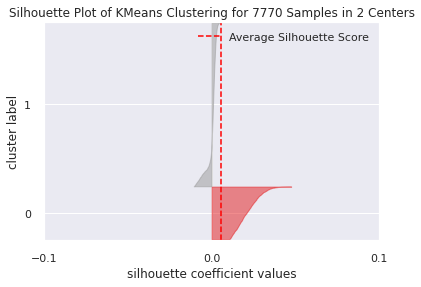

For n_clusters = 3, silhouette score is 0.006341747543884603


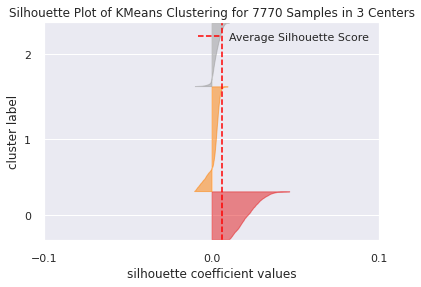

For n_clusters = 4, silhouette score is 0.0069922570281062075


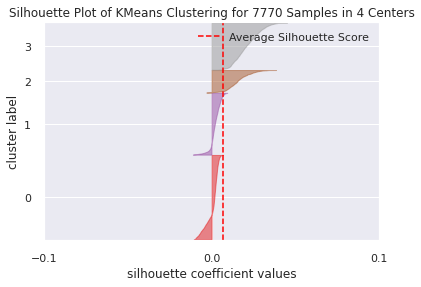

For n_clusters = 5, silhouette score is 0.00778153588971564


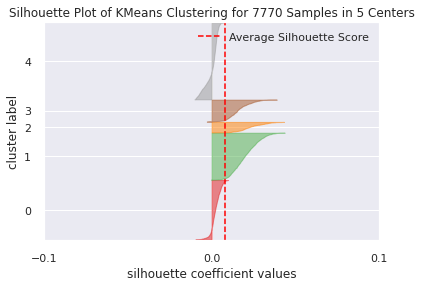

For n_clusters = 6, silhouette score is 0.004088486379446393


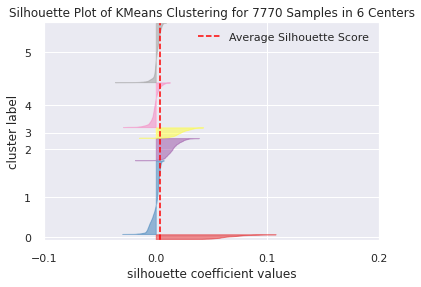

For n_clusters = 7, silhouette score is 0.006868641858169243


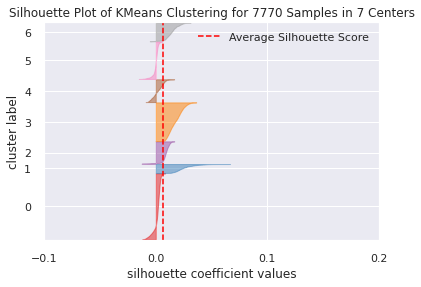

For n_clusters = 8, silhouette score is 0.005346046997571606


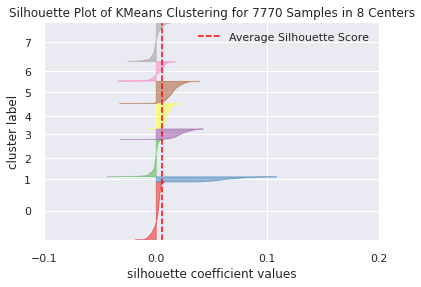

For n_clusters = 9, silhouette score is 0.005337638171111949


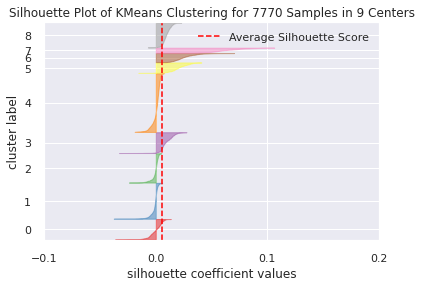

For n_clusters = 10, silhouette score is 0.005707113627357063


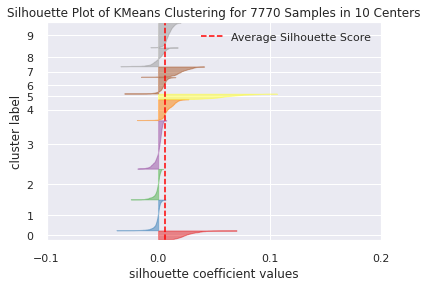

For n_clusters = 11, silhouette score is 0.005627094688056628


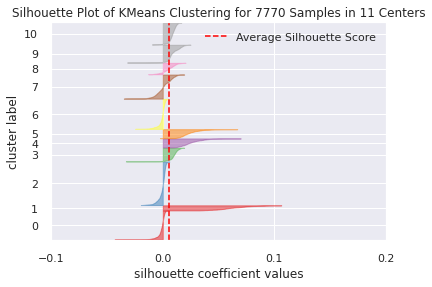

For n_clusters = 12, silhouette score is 0.006324282508037311


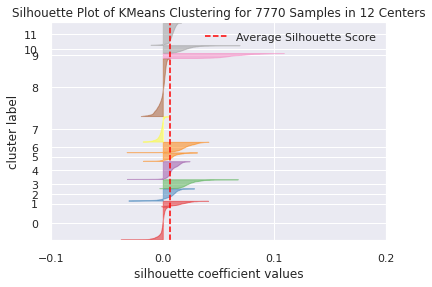

For n_clusters = 13, silhouette score is 0.006367722372263612


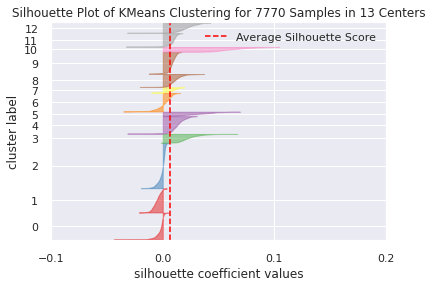

For n_clusters = 14, silhouette score is 0.0063706277743421635


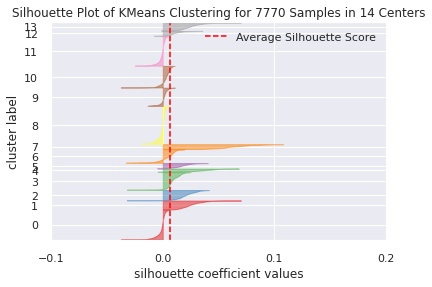

In [108]:
silhouette_score_analysis(15)

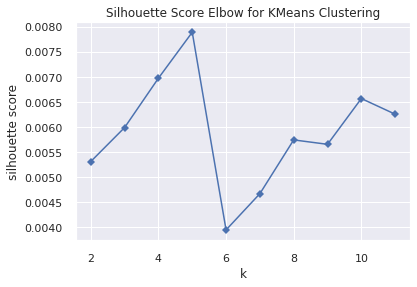

In [109]:
# silhouette score visualizer
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [110]:
# set clusters to 15 ( To start with as a test )
k_clusters = 15

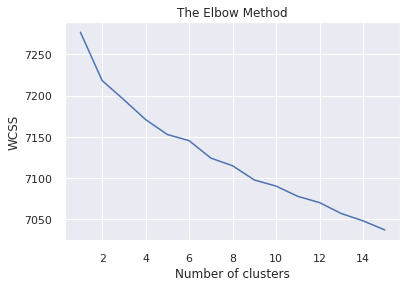

In [111]:
# plot elbow graph 
wcss = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [112]:
k_clusters = 10

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_transformed)

KMeans(max_iter=600, n_clusters=10, random_state=0, tol=1e-06)

In [113]:
clusters = model.predict(X_transformed)

In [114]:
# Create a new column to display the predicted result
cluster_df["ClusterName"] = clusters
cluster_df.head(20)

,title,cluster_data,ClusterName
0,3%,futur elit inhabit island paradis far crowd sl...,8
1,7:19,devast earthquak hit mexico citi trap survivor...,1
2,23:59,armi recruit found dead fellow soldier forc co...,1
3,9,postapocalypt world ragdol robot hide fear dan...,7
4,21,brilliant group student becom cardcount expert...,7
5,46,genet professor experi treatment comatos siste...,8
6,122,aw accid coupl admit grisli hospit separ must ...,1
7,187,one high school student attack dedic teacher t...,7
8,706,doctor goe miss psychiatrist wife treat bizarr...,4
9,1920,architect wife move castl slate becom luxuri h...,4


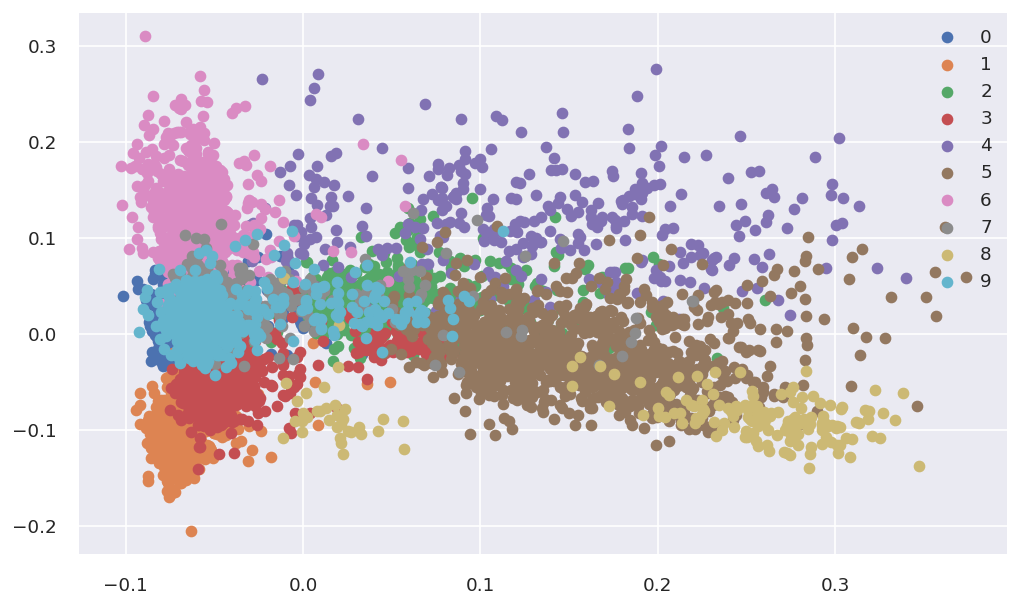

In [115]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

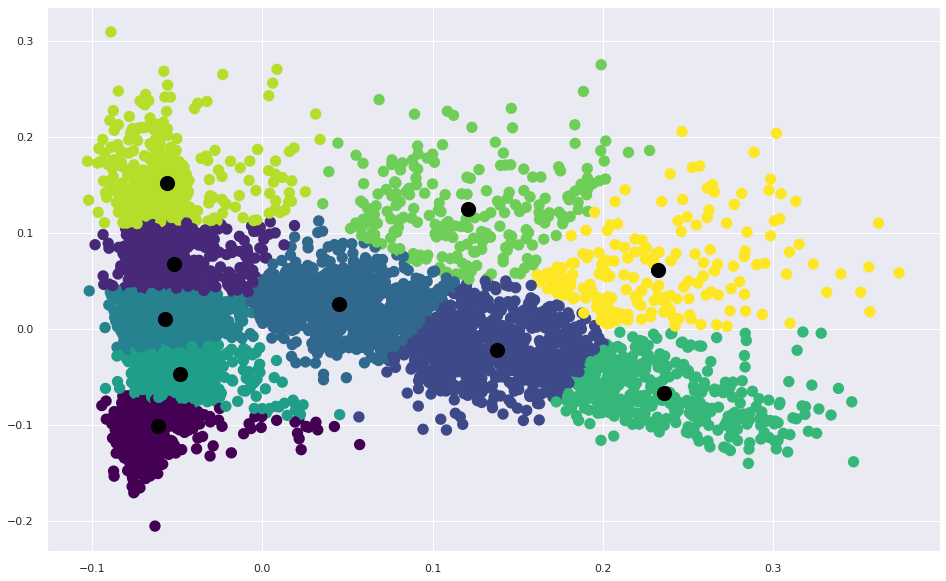

In [116]:
# plot clusters with centers
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_transformed)
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(16, 10))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=None);

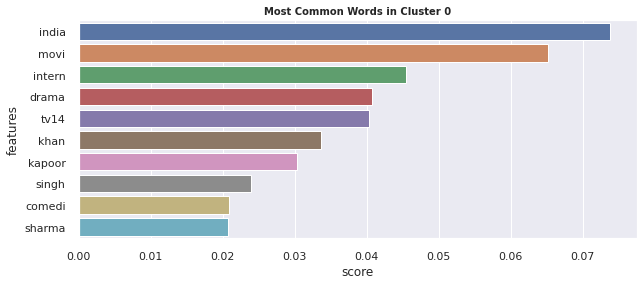

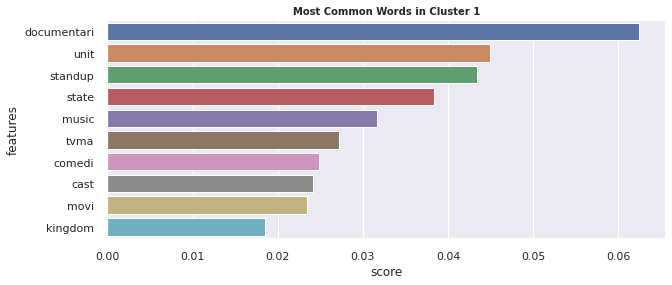

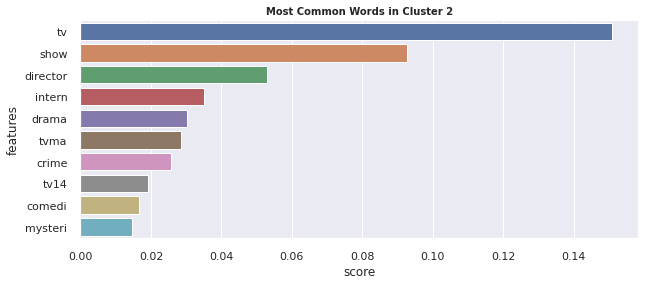

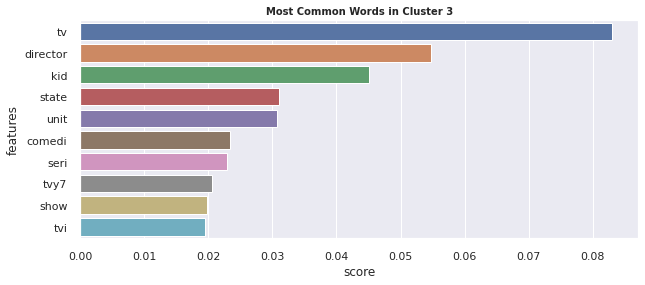

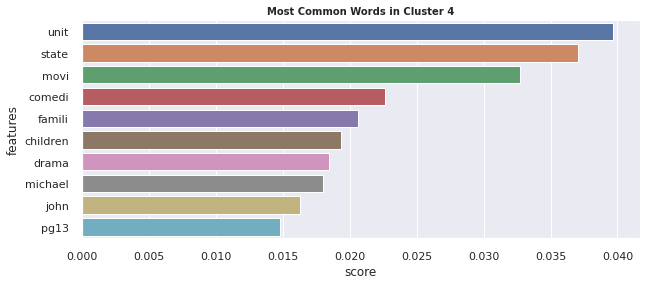

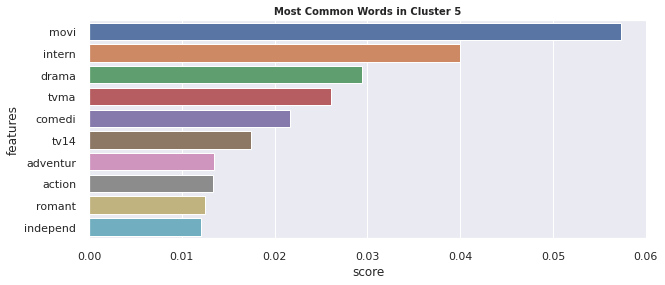

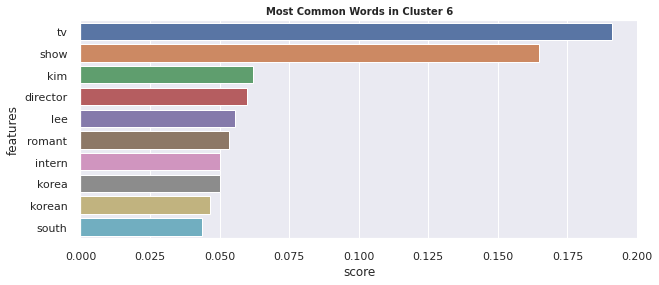

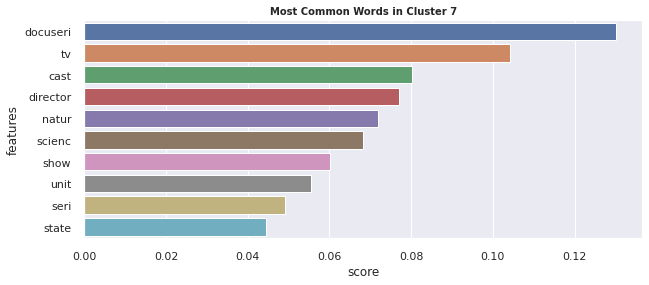

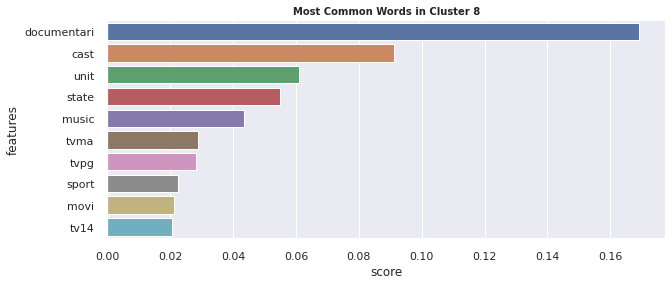

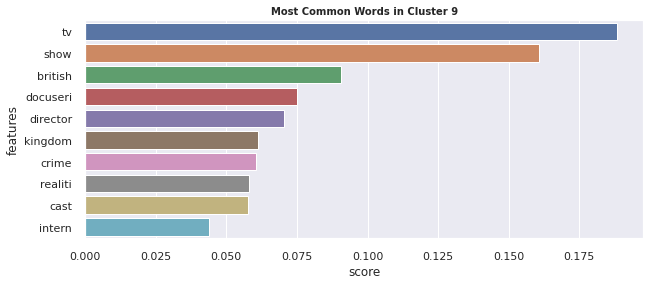

In [117]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = t_vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(X.toarray(), prediction, 10)
plotWords(dfs, 10)

In [118]:
# Just print it to the screen
order_centroids = model.cluster_centers_.argsort()[:,::-1]

terms = t_vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))


Cluster 0: 007 10 11yearold 100 13 16yearold 1920s 17yearold 1989 1968
Cluster 1: 13 12 100 1967 16yearold 1979 14thcenturi 16 11 1940s
Cluster 2: 10000 10 11yearold 11 12 18th 1920s 1969 1976 16
Cluster 3: 100000 007 10000 11yearold 11 100 14 15yearold 15 adebayo
Cluster 4: 100 11yearold 12yearold 13yearold 1960s 14yearold 17 18 2014 15
Cluster 5: 10 100 12yearold 100000 13yearold 11 12 14thcenturi 15 14
Cluster 6: 007 10yearold 11 13yearold 10 14 12 18 16yearold 11yearold
Cluster 7: 100000 14yearold 10 15yearold 12yearold 18yearold 2018 16yearold 10yearold 2012
Cluster 8: 007 12yearold 12 10yearold 14yearold 17yearold 1962 1940s 14thcenturi 17
Cluster 9: 10yearold 100 10000 100000 10 13 16 1981 17yearold 1976


In [119]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [120]:
# word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

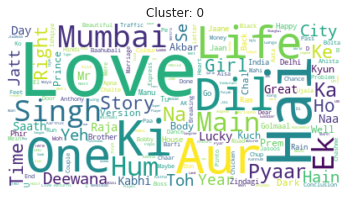

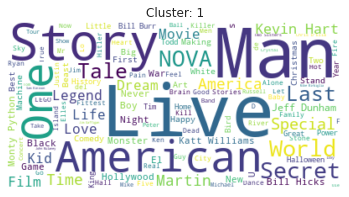

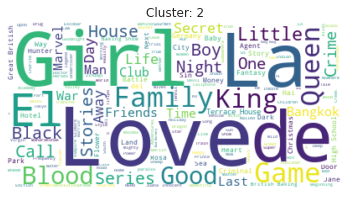

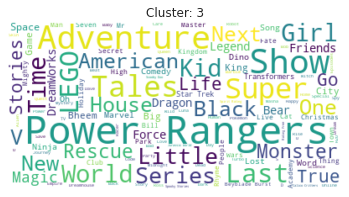

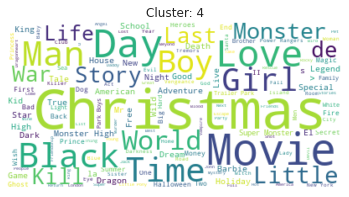

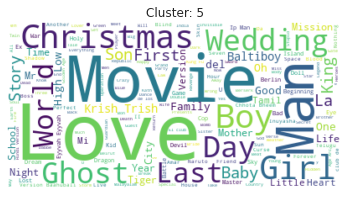

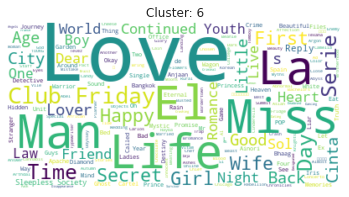

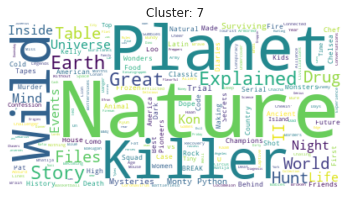

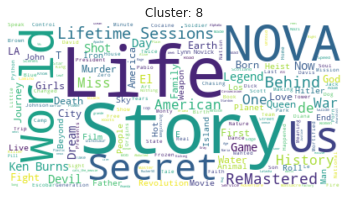

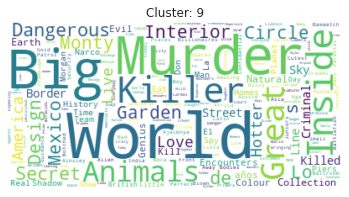

In [121]:
for i in range(10):
  func_select_Category(i,'title')

## **Recommendations**

In [122]:
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [123]:
# print cosine_sim
cosine_sim = cosine_similarity(X, X)
cosine_sim

array([[1.        , 0.06620955, 0.02421822, ..., 0.0103143 , 0.02983994,
        0.00426983],
       [0.06620955, 1.        , 0.00617642, ..., 0.05653104, 0.002283  ,
        0.00455165],
       [0.02421822, 0.00617642, 1.        , ..., 0.00767782, 0.00215586,
        0.        ],
       ...,
       [0.0103143 , 0.05653104, 0.00767782, ..., 1.        , 0.00716889,
        0.21892758],
       [0.02983994, 0.002283  , 0.00215586, ..., 0.00716889, 1.        ,
        0.02791593],
       [0.00426983, 0.00455165, 0.        , ..., 0.21892758, 0.02791593,
        1.        ]])

In [124]:
indices = pd.Series(cluster_df.index)

In [125]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [126]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Zulu Man in Japan'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
1,Roots
2,"Nightmare Tenants, Slum Landlords"
3,Bad Rap
4,We Are One
5,Rhythm + Flow
6,LA Originals
7,Emicida: AmarElo - It’s All For Yesterday
8,Miss Sharon Jones!
9,Trixie Mattel: Moving Parts


In [127]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('3%'), columns=['Recommendations'])
tvshows_recommendations.head(11)

,Recommendations
0,All The Reasons To Forget
1,Lo que la verdad esconde: El caso Asunta (Oper...
2,Kissing Game
3,The Chosen One
4,Back with the Ex
5,Blood Pact
6,Secrets of Great British Castles
7,Away
8,The Underclass
9,Million Pound Menu


# **Conclusion**

**EDA:**

1. More Movies(69.1%) on Netflix than TV shows(30.9%).

2. Growth in TV shows from 2018 to 2020 and decreases in movies from 2019 to 2020. Therefore Netflix has increasingly focusing on TV rather than movies in recent years.

3. The largest count of movies are made with the 'TV-MA', 'TV-14' and 'R' rating and the largest count of TV shows are made with the 'TV-MA', 'TV-14' and  'TV-PG' rating.

4.  2017 was the year when most of the movies and 2020 was the year when most of the TV shows were released.

5. A good amount of movies on Netflix are among the duration of 75-120 mins.

6. International Movies and Dramas are top two Genres on Netflix.

7. Anupam kher was top actor acted in most number of titles and movies. Six of the actors among the top ten actors with maximum content are from India. Takahiro sakurai was top actor acted in most number of tv shows.

8. Jan suter and Raul Campos are top two directors on the basis of number of titles.

9. Grey's Anatomy had highest number of seasons 16.

10. More of the content was released in holiday season - October, November, December and January

11. The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19.

12. United State was highest contributor on netflix.

**Topic modeling:**

1. Topic modeling by using Latent Dirichlet Allocation (LDA) perform on text dataset. 

2. Obtain highest coherence score on 7 number of topic.

3. Feed the LDA model into the pyLDAvis instance and obtain intertopic distance map (via multidimensional scaling).

**K-means clustering:**

1. k=10 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.

2. Obtain cluster using k=10 and found top words obtain in cluster.

3. Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained.